'Scaling'

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('sIMG_2180.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)#INTER_

In [3]:
res.shape[0]

1536

In [4]:
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image',img)
cv2.namedWindow('res', cv2.WINDOW_AUTOSIZE)
cv2.imshow('res',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
cv2.imwrite('output.jpg',res)

True

"Translate"

In [9]:
img = cv2.imread('ML.jpg',0)
rows,cols = img.shape

In [10]:
x=50
y=100

In [11]:
M = np.float32([[1,0,x],[0,1,y]])

In [12]:
M

array([[  1.,   0.,  50.],
       [  0.,   1., 100.]], dtype=float32)

In [13]:
dst = cv2.warpAffine(img,M,(cols*2,rows*2))

In [14]:
dst = cv2.line(dst,(0,0),(x,y),(255,0,0),1)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rotate

In [15]:
img = cv2.imread('ML.jpg',0)
rows,cols = img.shape

In [16]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)

In [17]:
M = cv2.getRotationMatrix2D((0,0),45,1)

In [19]:
dst = cv2.warpAffine(img,M,(cols,rows))

In [20]:
cv2.imshow('oimg',img)
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
img = cv2.imread('ml.jpg',0)
rows,cols = img.shape

def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
#img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

Affine Transformation

In [22]:
from matplotlib import pyplot as plt

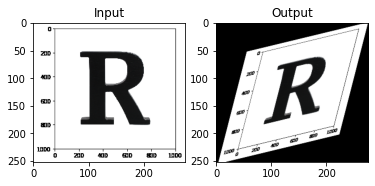

In [23]:
img = cv2.imread('LetterR_opencv.png')
rows,cols,ch = img.shape
pts1 = np.float32([[40,10],[258,10],[40,228]])
pts2 = np.float32([[85,52],[258,10],[40,228]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [24]:
mousex = 0
mousey = 0
x=50
y=100
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        M = cv2.getAffineTransform(pts1,pts2)
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
#img = np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    pts2 = np.float32([[x,y],[258,10],[40,228]])
    #print(mousex ,mousey)
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

Perspective Transformation

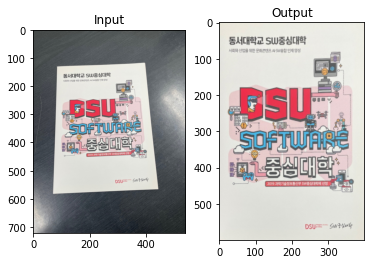

In [25]:
img = cv2.imread('perspective.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[86,131],[394,124],[440,563],[71,580]])
pts2 = np.float32([[0,0],[400,0],[400,600],[0,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(400,600))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img),plt.title('Input')
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

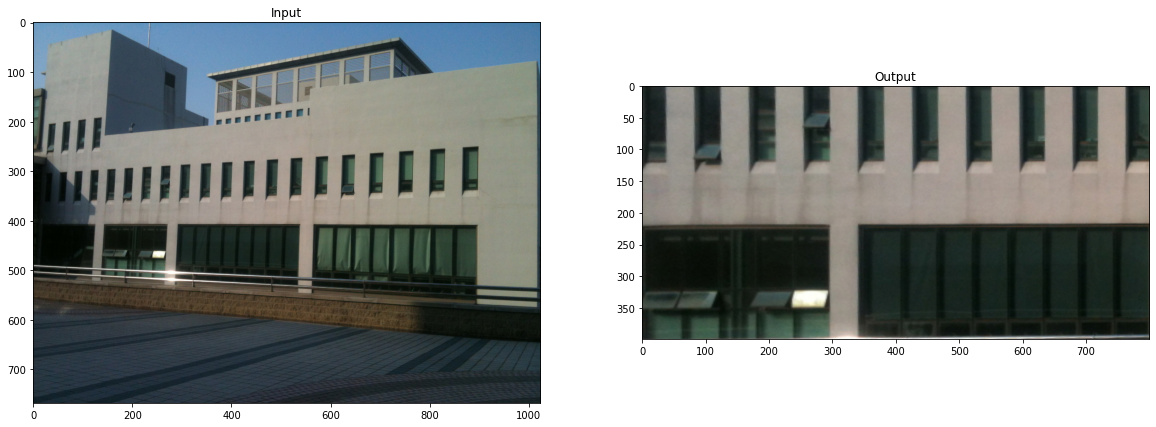

In [27]:
img = cv2.imread('001.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[151,300],[542,277],[534,518],[139,495]])
pts2 = np.float32([[0,0],[800,0],[800,400],[0,400]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(800,400))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Input')
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Without cv2.warpPerspective

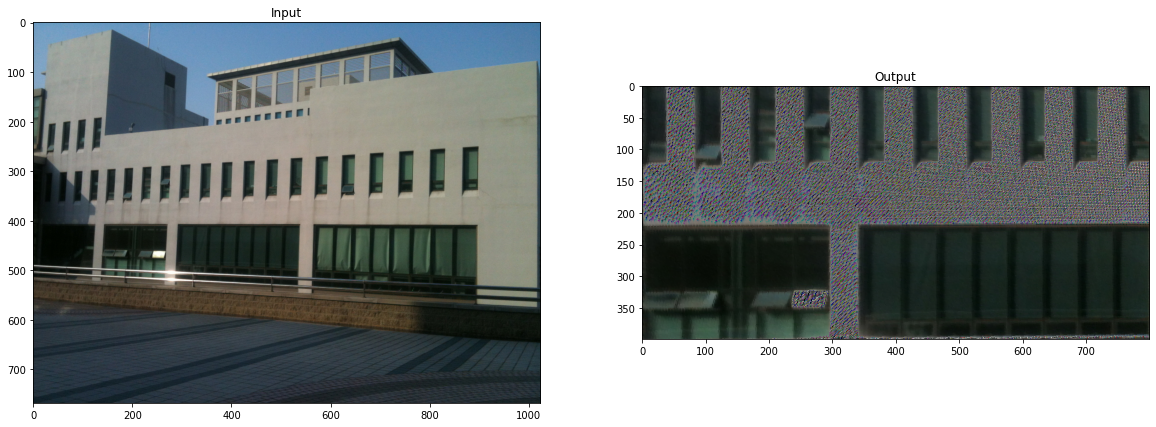

In [29]:
img = cv2.imread('001.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[151,300],[542,277],[534,518],[139,495]])
pts2 = np.float32([[0,0],[800,0],[800,400],[0,400]])
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = np.zeros([400, 800, 3], np.uint8)
rows2,cols2,ch2 = dst.shape
for i in range(rows):
    for j in range(cols):
        nop1 = np.float32([[j],[i],[1]])
        nop2 = np.dot(M,nop1)
        if nop2[2]!=0. :
            x = nop2[0]/nop2[2]
            y = nop2[1]/nop2[2]
        if int(x)>=0 and int(y)>=0 and int(x)<= cols2-1 and int(y)<= rows2-1:
            dst[int(y)][int(x)]=img[i][j]

for i in range(rows2):
    for j in range(cols2):
        if (dst[i][j]==[0,0,0]).all() :
            dst[i][j] = (dst[i][j-1]+dst[i-1][j])/2
            
plt.figure(figsize=(20,20))  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img),plt.title('Input')
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()